### DataLoader

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
cancer = load_breast_cancer()
# cancer # 유방암 데이터

### Model 생성과 학습하기

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42, 
                                                    stratify=cancer.target) # 지정한 데이터의 비율을 유지, ex) 악성:양성 = 3:7
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Score Evaluation - Training vs Test
    Training의 성능의 100이 나오면 Overfitting임을 확인할 수 있다.

In [4]:
print(f"Training DataSet 정확도 : {tree.score(X_train, y_train)}")
print(f"Training DataSet 정확도 : {tree.score(X_test, y_test)}")

Training DataSet 정확도 : 1.0
Training DataSet 정확도 : 0.9370629370629371


### Prunning

In [5]:
# 모델 생성시 옵션을 부여한다.
tree = DecisionTreeClassifier(
    min_samples_split=30, 
#     max_depth=4, 
    random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=30, random_state=0)

In [6]:
print(f"Training DataSet 정확도 : {tree.score(X_train, y_train)}")
print(f"Training DataSet 정확도 : {tree.score(X_test, y_test)}")

Training DataSet 정확도 : 0.9765258215962441
Training DataSet 정확도 : 0.9440559440559441


### 특성 중요도
    결정트리 모델을 생성하고 수행하게 되면
    결과적으로 속성의 중요도를 알 수 있는 특성 중요도 인스턴스가 생성된다.
    
    결정트리를 만드는 데 있어서
    어떤 의사결정, 조건, 질문, 특징, 속성으로 결정되는가...다 같은 말이다.
    
    트리 구조상 위에 있는 특성의 중요도가 높다.
    아래에 있는 특성은 중요도가 떨어지는데 이를 바로 필요없는 속성으로 간주하는 것은 위험하다.
    
    머신러닝의 flow를 짚어보면,
    1. 데이터분석(로드된 데이터에서 속성을 추출 | 추출된 속성들을 정제, 가공)
    2. 결정트리 모델 생성, 학습을 진행
    3. 특성 중요도 도출 --- 학습하고 있는 속성들 30개 중에서 중요한 속성을 구분한다.
    4. 3번의 작업을 바탕으로 어떤 특성이 중요한지 사용자, 의뢰인에게 알려줄 수 있고
       해당 특성 정보를 이용해서 더 효율적인 작업을 진행하여
       추후 성능을 좀 더 높이는데 활용할 수 있다.
       기여도가 크지 않은 속성을 제거해 overfitting 가능성을 줄일 수 있다.

In [7]:
print(f"특성 중요도 : \n{tree.feature_importances_}")

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01057372 0.05018448
 0.         0.00258721 0.00250475 0.         0.         0.
 0.         0.         0.75365346 0.03501711 0.         0.
 0.         0.         0.01885926 0.12662001 0.         0.        ]


### 특성 중요도 시각화

In [8]:
import matplotlib.pyplot as plt
import numpy as np

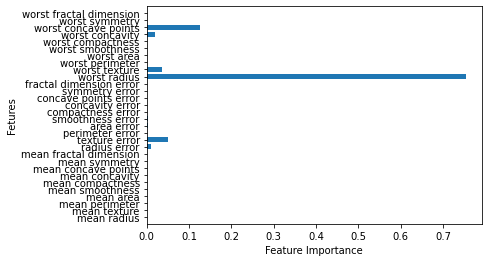

In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Fetures")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

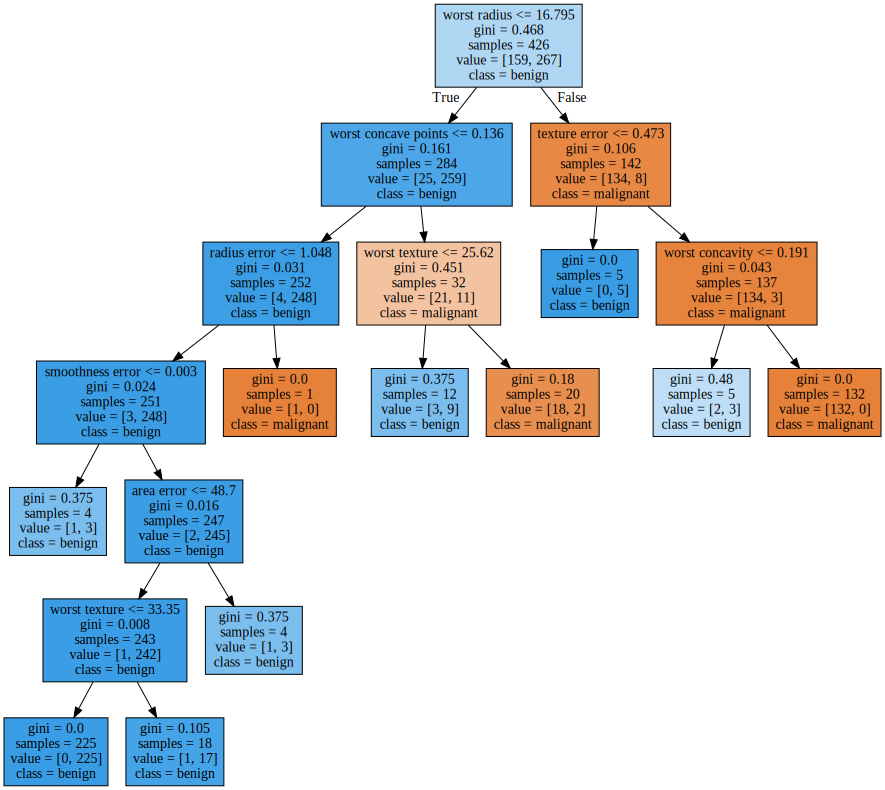

In [10]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='cancer_tree.dot', 
                class_names=cancer.target_names, 
                feature_names=cancer.feature_names, 
                filled=True) # filled: node의 색깔을 다르게

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)